# Clustering via XAI

This notebook takes a kmeans-clustering algorithm and rewrites it as a 2-layer Neural Net, following Kauffmann et al. 2021 (https://arxiv.org/abs/1906.07633). Then, one can use XAI-techniques to analyse the NN. Kauffmann et al. propose Layer-Relevance-Propagation LRP (which will be implemented at a later stage in this notebook).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import *

In [2]:
x = np.random.normal(0,1,100).reshape(-1,1)
y = np.random.normal(0,1,100).reshape(-1,1)
z = np.random.normal(0,1,100).reshape(-1,1)
Data = np.concatenate((x,y,z), axis=1)

x = np.random.normal(0,1,100).reshape(-1,1)
y = np.random.normal(5,1,100).reshape(-1,1)
z = np.random.normal(0,1,100).reshape(-1,1)
newDat = np.concatenate((x,y,z), axis=1)
Data = np.concatenate((Data,newDat))

x = np.random.normal(5,1,100).reshape(-1,1)
y = np.random.normal(-5,1,100).reshape(-1,1)
z = np.random.normal(0,1,100).reshape(-1,1)
newDat = np.concatenate((x,y,z), axis=1)
Data = np.concatenate((Data,newDat))

x = np.random.normal(0,1,100).reshape(-1,1)
y = np.random.normal(0,1,100).reshape(-1,1)
z = np.random.normal(5,1,100).reshape(-1,1)
newDat = np.concatenate((x,y,z), axis=1)
Data = np.concatenate((Data,newDat))
print(Data.shape)

(400, 3)


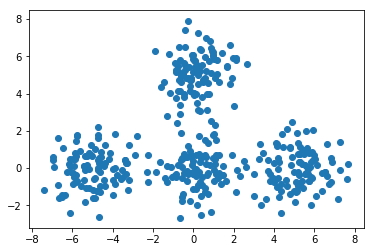

In [3]:
plt.scatter(Data[:,1], Data[:,2])

In [4]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(Data)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[-0.09445339  5.1748603  -0.04592667]
 [ 5.03976267 -5.04148153 -0.03570522]
 [ 0.03921555  0.19500331  5.13025017]
 [ 0.0370871   0.19722005 -0.05196173]]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


## Neuralising K-Means

We neuralise the clustering classifier with respect to class 0, i.e. write a net that should tell us whether an instance belongs to class 0 or not.

In [5]:
def layer1(x, centroids, i):
    # takes one instance x, centroid-matrix and index of ith centroid
    # returns values for the distances to centroid i
    mu_c = centroids[i]
    w = 2*(mu_c - mu) 
    b = (mu**2.).sum(1) - (mu_c**2.).sum()
    h = w.dot(x) + b
    return(h)

layer1(x, kmeans.cluster_centers_, 0)
    

NameError: name 'mu' is not defined

In [ ]:
def layer2(h):
    return(min(h) >= 0)

for i in range(4):
    print(layer2(layer1(x, 
                   kmeans.cluster_centers_,
                   i)))

## Testing this 2-Layer-NN

In [ ]:
X = np.random.multivariate_normal(np.ones(3)*2.5, 
                              np.eye(3), 
                              size=1000)
Cluster_Pred = kmeans.predict(X)

In [ ]:
# Now predict via the layers
Layer_Pred = np.empty(1000)



for i in range(1000):
    for j in range(4):
        if layer2(layer1(X[i,:],kmeans.cluster_centers_,j)):
            Layer_Pred[i] = range(4)[j]


In [ ]:
sum(Layer_Pred != Cluster_Pred)
# Very good! The numerics don't introduce any unexpected errors!